# This is a the All-Sky Test Simulation for DAMS TESS OBAF Convective Core Stars

# Star Selection Rules

From Andrew:
TThe DAMS program is about eclipsing/astrometric SB2 binaries, so the target selection will be finalised in summer after TESS has completed its nominal mission.

The original idea was to observe these stars with APOGEE, however I do not see why APOGEE would be better than BOSS for the vast majority of OB stars. Yet, I think it is necessary to target AF stars with the APOGEE instrument. So, ideally, it should be: if (OB) then BOSS, else APOGEE. This is probably too complicated for the sims at this point, so my suggestion is to request APOGEE data for all those stars and to check the completeness vs available (=unused) BOSS fibers afterwards.

When selecting targets, I imposed the magnitude cut at Hmag = 11.5 (yet another reason to ask for APOGEE data at this point since we can go fainter with BOSS). Also, stars brighter than Hmag=7 were excluded.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.table import Table,vstack
import astropy.units as u
from targetlib import testfield_gal,testfield_fk5,testfield_ecl,h2exp
from astropy.coordinates import SkyCoord
from astropy.coordinates import Galactic,FK5,BarycentricTrueEcliptic
%matplotlib inline

## History
- New in Gamma-2-yso
   - No changes with respect to Gamma-2-cad_match
- New in Gamma-2-cad_match
   - Split 8x3 into two groups:
       - 8x2 for brighter than H=11
       - 8x4 for dimmer than H=11
   - Set delta_min = 1
   - Set delta_max = 3000
- New in Gamma-0
    - Renamed class from TESS OBAF to DAMS
    - All new targets See email on 3/4/2020
    - All new cadences

In [2]:
#Define some helper functions
def safe_less(array, value):
    '''
    Return a mask for indices that are less than value. Is NaN safe.
    
    Arguments:
        array: numerical numpy array with NaNs
        value: value below, which function returns true
    Returns:
        boolean array with True for indices less than value and False for all other
        values including NaNs
    '''   
    mask = np.zeros(array.shape, dtype=bool)
    np.less(array, value, out=mask, where=~np.isnan(array)) #Used to avoid warning with nan values
    return(mask)
def safe_greater(array, value):
    '''
    Return a mask for indices that are more than value. Is NaN safe.
    
    Arguments:
        array: numerical numpy array with NaNs
        value: value greater, which function returns true
    Returns:
        boolean array with True for indices greater than value and False for all other
        values including NaNs
    '''   
    mask = np.zeros(array.shape, dtype=bool)
    np.greater(array, value, out=mask, where=~np.isnan(array)) #Used to avoid warning with nan values
    return(mask)


In [3]:
ver = 'gamma-2-yso'
obaf1_target_tab = Table.read('workspace/target_files/OBAF/{}/mwm_tess_obaf_8x1.csv'.format(ver)
                         ,format='ascii')
obaf3_target_tab = Table.read('workspace/target_files/OBAF/{}/mwm_tess_obaf_8x3.csv'.format(ver)
                         ,format='ascii')
obaf1_target_tab

RA,Dec,Hmag
float64,float64,float64
97.1905111991394,-55.9171573520957,8.326
94.2695531422105,-55.4146990398069,7.417
94.619653204524,-56.9999648044627,7.688
81.5618023448357,-56.6449640360288,9.196
100.711387414407,-56.0160722430723,8.357
93.7351839717515,-56.2013592349194,8.921
97.4443424583465,-57.2751178658189,8.58
86.0838199851771,-56.916059240985,7.405
97.7741677481463,-56.9389643469759,8.685


## Split 8x3 into 8x2 and 8x4 at H=11

In [4]:
obaf2_target_tab = obaf3_target_tab[(obaf3_target_tab['Hmag'] < 11)]
obaf2_target_tab

RA,Dec,Hmag
float64,float64,float64
91.0513650357723,-55.9474287568939,9.537
84.6044485919174,-55.2382176836452,10.217
79.2517361577462,-55.9239914225397,10.123
82.1808964289137,-56.8690918173083,10.579
99.640957185678,-56.8418877947962,9.609
99.2498951089785,-57.9433805060858,10.138
93.7168356924936,-56.2307589428987,10.714
97.2477036522102,-57.0200364431695,10.172
100.98708329568,-56.4145673605748,9.636


In [5]:
obaf4_target_tab = obaf3_target_tab[(obaf3_target_tab['Hmag'] >= 11)]
obaf4_target_tab

RA,Dec,Hmag
float64,float64,float64
97.4753547741182,-55.8477293540202,11.487
75.1261505860038,-57.9004843503225,11.066
102.881398142316,-56.2072672842993,11.242
103.939660404695,-58.1433730115327,11.282
98.0605902299448,-58.1258815054395,11.253
97.9565882618381,-60.787957661992,11.131
106.162748183463,-60.1476096234057,11.158
89.0863974902443,-60.7622405012789,11.401
92.0666946504553,-61.2441161020971,11.309


## Plot stars

/home/deleenm/Dropbox/Research/notebooks/SDSS-V SimTargets/allsky/targetlib.py:148: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  bmap = Basemap(projection='moll', lon_0=180,lat_0=0)
/usr/local/lib/student/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


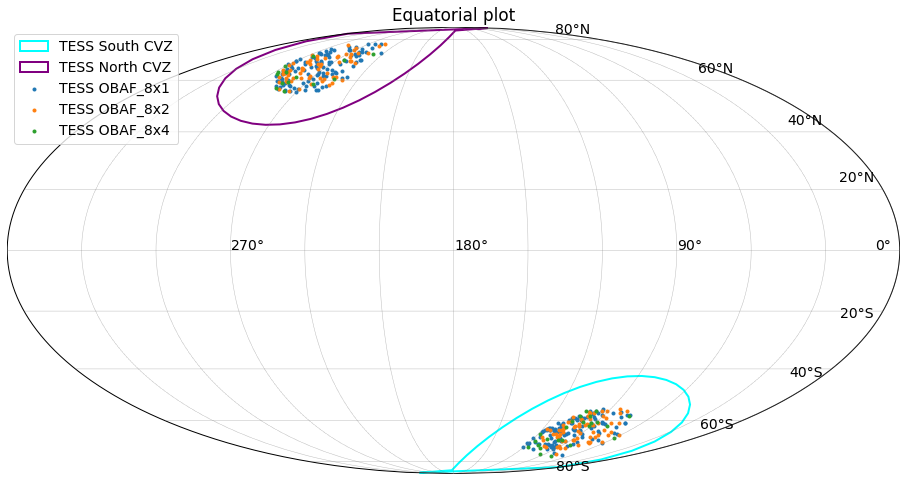

In [6]:
plt.rcParams.update({'font.size': 14})

(fig,bmap) = testfield_fk5()
#Plot OBAF Targets
xplan,yplan = bmap(obaf1_target_tab['RA'],obaf1_target_tab['Dec'])
bmap.scatter(xplan,yplan,marker='.',label='TESS OBAF_8x1',alpha=1)
xplan,yplan = bmap(obaf2_target_tab['RA'],obaf2_target_tab['Dec'])
bmap.scatter(xplan,yplan,marker='.',label='TESS OBAF_8x2',alpha=1)
xplan,yplan = bmap(obaf4_target_tab['RA'],obaf4_target_tab['Dec'])
bmap.scatter(xplan,yplan,marker='.',label='TESS OBAF_8x4',alpha=1)
plt.title("Equatorial plot")
plt.legend()
plt.show()

## Create Target Table

In [7]:
target_tab = Table()

In [8]:
cadence_arr = np.concatenate([np.repeat('mwm_tess_obaf_8x1',len(obaf1_target_tab)),
                              np.repeat('mwm_tess_obaf_8x2',len(obaf2_target_tab)),
                              np.repeat('mwm_tess_obaf_8x4',len(obaf4_target_tab))])

In [9]:
target_tab['ra'] = np.concatenate([obaf1_target_tab['RA'],obaf2_target_tab['RA'],obaf4_target_tab['RA']])
target_tab['dec'] = np.concatenate([obaf1_target_tab['Dec'],obaf2_target_tab['Dec'],obaf4_target_tab['Dec']])
target_tab['cadence'] = cadence_arr
target_tab['type'] = np.repeat('TESS_OBAF',len(cadence_arr))
target_tab['priority'] = np.repeat(np.array(25,dtype='int32'),len(cadence_arr))
target_tab['value'] = np.repeat(np.array(1.0,dtype='float32'),len(cadence_arr))

In [10]:
target_tab

ra,dec,cadence,type,priority,value
float64,float64,str17,str9,int32,float32
97.1905111991394,-55.9171573520957,mwm_tess_obaf_8x1,TESS_OBAF,25,1.0
94.2695531422105,-55.4146990398069,mwm_tess_obaf_8x1,TESS_OBAF,25,1.0
94.619653204524,-56.9999648044627,mwm_tess_obaf_8x1,TESS_OBAF,25,1.0
81.5618023448357,-56.6449640360288,mwm_tess_obaf_8x1,TESS_OBAF,25,1.0
100.711387414407,-56.0160722430723,mwm_tess_obaf_8x1,TESS_OBAF,25,1.0
93.7351839717515,-56.2013592349194,mwm_tess_obaf_8x1,TESS_OBAF,25,1.0
97.4443424583465,-57.2751178658189,mwm_tess_obaf_8x1,TESS_OBAF,25,1.0
86.0838199851771,-56.916059240985,mwm_tess_obaf_8x1,TESS_OBAF,25,1.0
97.7741677481463,-56.9389643469759,mwm_tess_obaf_8x1,TESS_OBAF,25,1.0


In [11]:
target_tab.write('{}/mwm_tess_obaf_target_{}.fits'.format(ver,ver),overwrite=True)

## Create Cadence Table

## Cadence rules
The cadences are:
- 8 epochs with 1 exposure for stars with Hmag < 9.5;
- 8 epochs with 2 back-to-back exposures for stars with 9.5 < Hmag < 11
- 8 epochs with 4 back-to-back exposures for stars with 11 > Hmag 
- Delta min 1 days, Delta max is 3000

In [12]:
cadence_tab = Table()

In [13]:
cadence_tab['cadence'] = ["mwm_tess_obaf_8x1","mwm_tess_obaf_8x2","mwm_tess_obaf_8x4"]
cadence_tab['nepochs'] = [8,16,32]
cadence_tab

cadence,nepochs
str17,int64
mwm_tess_obaf_8x1,8
mwm_tess_obaf_8x2,16
mwm_tess_obaf_8x4,32


In [14]:
#Make all the deltas size 45
obaf1_delta_arr = np.concatenate([[0.,45.,45.,45.,45.,45.,45.,45.],np.repeat(np.nan,24)])
obaf2_delta_arr = np.concatenate([np.array([0.,0.,45.,0.,45.,0.,45.,0.,45.,0.,45.,0.,45.,0.,45.,0.],
                                           dtype=np.float32),np.repeat(np.nan,16)])
obaf4_delta_arr = np.array([0.,0.,0.,0.,45.,0.,0.,0.,45.,0.,0.,0.,45.,0.,0.,0.,45.,0.,0.,0.,45.,0.,0.
                                            ,0.,45.,0.,0.,0.,45.,0.,0.,0.],dtype=np.float32)                                  
delta_arr = np.array([obaf1_delta_arr,obaf2_delta_arr,obaf4_delta_arr],dtype='float32')
print(delta_arr)
cadence_tab['delta'] = delta_arr
cadence_tab

[[ 0. 45. 45. 45. 45. 45. 45. 45. nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [ 0.  0. 45.  0. 45.  0. 45.  0. 45.  0. 45.  0. 45.  0. 45.  0. nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [ 0.  0.  0.  0. 45.  0.  0.  0. 45.  0.  0.  0. 45.  0.  0.  0. 45.  0.
   0.  0. 45.  0.  0.  0. 45.  0.  0.  0. 45.  0.  0.  0.]]


cadence,nepochs,delta [32]
str17,int64,float32
mwm_tess_obaf_8x1,8,0.0 .. nan
mwm_tess_obaf_8x2,16,0.0 .. nan
mwm_tess_obaf_8x4,32,0.0 .. 0.0


In [15]:
#Make all the delta_mins 1 day from delta except for zeros 
delta_min_arr = delta_arr
mask = safe_greater(delta_min_arr,0)
delta_min_arr[mask] = 1
print(delta_min_arr)
cadence_tab['delta_min'] = delta_min_arr
cadence_tab

[[ 0.  1.  1.  1.  1.  1.  1.  1. nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [ 0.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0. nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  1.  0.
   0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.]]


cadence,nepochs,delta [32],delta_min [32]
str17,int64,float32,float32
mwm_tess_obaf_8x1,8,0.0 .. nan,0.0 .. nan
mwm_tess_obaf_8x2,16,0.0 .. nan,0.0 .. nan
mwm_tess_obaf_8x4,32,0.0 .. 0.0,0.0 .. 0.0


In [16]:
#Make all the delta_max 3000 days except for zeros, make them 0.04 to deal with passing clouds. 
delta_max_arr = delta_arr
mask = safe_less(delta_arr,.1)
delta_max_arr[mask] = 0.04

mask = safe_greater(delta_arr,.1)
delta_max_arr[mask] = 3000

#Fix first column
for i in range(len(delta_max_arr)):
    delta_max_arr[i][0] = 0

print(delta_max_arr)
cadence_tab['delta_max'] = delta_max_arr
cadence_tab

[[0.e+00 3.e+03 3.e+03 3.e+03 3.e+03 3.e+03 3.e+03 3.e+03    nan    nan
     nan    nan    nan    nan    nan    nan    nan    nan    nan    nan
     nan    nan    nan    nan    nan    nan    nan    nan    nan    nan
     nan    nan]
 [0.e+00 4.e-02 3.e+03 4.e-02 3.e+03 4.e-02 3.e+03 4.e-02 3.e+03 4.e-02
  3.e+03 4.e-02 3.e+03 4.e-02 3.e+03 4.e-02    nan    nan    nan    nan
     nan    nan    nan    nan    nan    nan    nan    nan    nan    nan
     nan    nan]
 [0.e+00 4.e-02 4.e-02 4.e-02 3.e+03 4.e-02 4.e-02 4.e-02 3.e+03 4.e-02
  4.e-02 4.e-02 3.e+03 4.e-02 4.e-02 4.e-02 3.e+03 4.e-02 4.e-02 4.e-02
  3.e+03 4.e-02 4.e-02 4.e-02 3.e+03 4.e-02 4.e-02 4.e-02 3.e+03 4.e-02
  4.e-02 4.e-02]]


cadence,nepochs,delta [32],delta_min [32],delta_max [32]
str17,int64,float32,float32,float32
mwm_tess_obaf_8x1,8,0.0 .. nan,0.0 .. nan,0.0 .. nan
mwm_tess_obaf_8x2,16,0.0 .. nan,0.0 .. nan,0.0 .. nan
mwm_tess_obaf_8x4,32,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.04


In [17]:
#Make all the lunations size 24
obaf1_lun = np.concatenate((np.repeat(1.0,8),np.repeat(np.nan,24)))
obaf2_lun = np.concatenate((np.repeat(1.0,16),np.repeat(np.nan,16)))
obaf4_lun = np.repeat(1.0,32)
lunation = np.array([obaf1_lun,obaf2_lun,obaf4_lun],dtype='float32')
print(lunation)
cadence_tab['lunation'] = lunation
cadence_tab

[[ 1.  1.  1.  1.  1.  1.  1.  1. nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]


cadence,nepochs,delta [32],delta_min [32],delta_max [32],lunation [32]
str17,int64,float32,float32,float32,float32
mwm_tess_obaf_8x1,8,0.0 .. nan,0.0 .. nan,0.0 .. nan,1.0 .. nan
mwm_tess_obaf_8x2,16,0.0 .. nan,0.0 .. nan,0.0 .. nan,1.0 .. nan
mwm_tess_obaf_8x4,32,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.04,1.0 .. 1.0


In [18]:
#Make all the instruments size 32
obaf1_inst = np.concatenate((np.repeat('apogee',8),np.repeat(np.nan,24)))
obaf2_inst = np.concatenate((np.repeat('apogee',16),np.repeat(np.nan,16)))
obaf4_inst = np.repeat('apogee',32)
instrument = np.array([obaf1_inst,obaf2_inst,obaf4_inst])
print(instrument)
cadence_tab['instrument'] = instrument
cadence_tab

[['apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan']
 ['apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee'
  'apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan' 'nan']
 ['apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee'
  'apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee'
  'apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee'
  'apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee']]


cadence,nepochs,delta [32],delta_min [32],delta_max [32],lunation [32],instrument [32]
str17,int64,float32,float32,float32,float32,str32
mwm_tess_obaf_8x1,8,0.0 .. nan,0.0 .. nan,0.0 .. nan,1.0 .. nan,apogee .. nan
mwm_tess_obaf_8x2,16,0.0 .. nan,0.0 .. nan,0.0 .. nan,1.0 .. nan,apogee .. nan
mwm_tess_obaf_8x4,32,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.04,1.0 .. 1.0,apogee .. apogee


In [19]:
cadence_tab.write('{}/mwm_tess_obaf_cadence_{}.fits'.format(ver,ver),overwrite=True)

In [20]:
test =  Table.read('{}/mwm_tess_obaf_cadence_{}.fits'.format(ver,ver))
test

cadence,nepochs,delta [32],delta_min [32],delta_max [32],lunation [32],instrument [32]
bytes17,int64,float32,float32,float32,float32,bytes128
mwm_tess_obaf_8x1,8,0.0 .. nan,0.0 .. nan,0.0 .. nan,1.0 .. nan,apogee .. nan
mwm_tess_obaf_8x2,16,0.0 .. nan,0.0 .. nan,0.0 .. nan,1.0 .. nan,apogee .. nan
mwm_tess_obaf_8x4,32,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.04,1.0 .. 1.0,apogee .. apogee
